# Crop Revenue Prediction Model

## Regression

<AxesSubplot: >

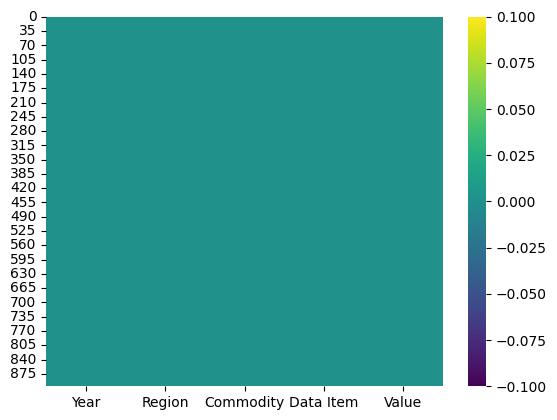

In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import statsmodels.api as sm


df = pd.read_csv("croprevenue.csv")
sns.heatmap(df.isnull(), cmap="viridis")

### KEY
Acres = Paid Pollinated Acres  |
DollarsAcre = Dollars per Acre  |
Colonies = Colonies Used  |
DollarsColony = Dollars per Colony  |

In [6]:
df = pd.read_csv("croprevenue.csv")
cols = ["Year", "Region", "Commodity", "Acres", "DollarsAcres", "DollarsColony", "Colonies"]
new_index = pd.RangeIndex(int(len(df)/(4)))
df_done = pd.DataFrame(columns=cols,index=new_index)
counter = -1
index = 0
for x in df.index:
    if (counter == 3):
        counter = 0
        index += 1
    else:
        counter += 1
    df_done["Year"][index] = df["Year"][x]
    df_done["Region"][index] = df["Region"][x]
    df_done["Commodity"][index] = df["Commodity"][x]
 
    if (counter % 4 == 0):
        df_done["Acres"][index] = df["Value"][x]
    elif (counter % 4 == 1):
        df_done["DollarsAcres"][index] = df["Value"][x]
    elif (counter % 4 == 2):
        df_done["DollarsColony"][index] = df["Value"][x]
    elif (counter % 4 == 3):
        df_done["Colonies"][index] = df["Value"][x]

In [7]:
df_done

,Year,Region,Commodity,Acres,DollarsAcres,DollarsColony,Colonies
0,2022,REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...,APPLES,"68,400",43.8,91.2,"39,000"
1,2022,REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...,BLUEBERRIES,"45,900",179,98.4,"87,000"
2,2022,REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...,CHERRIES,"28,000",34.5,78.9,"16,500"
3,2022,REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...,CRANBERRIES,"27,700",185,81.6,"65,000"
4,2022,REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...,CROP TOTALS,"203,400","21,895,000",91,87.5
...,...,...,...,...,...,...,...
221,2015,REGION 6 & 7 (AZ CA HI),MELONS,49.9,"8,000","10,300",82.2
222,2015,REGION 6 & 7 (AZ CA HI),PLUMS,46.8,"20,000","13,000",117
223,2015,REGION 6 & 7 (AZ CA HI),RASPBERRIES,85.5,"20,000","3,100",159
224,2015,REGION 6 & 7 (AZ CA HI),SUNFLOWER,147,"6,500","21,400",53.3


In [8]:
print(df_done.dtypes)
df_done["Acres"] = df_done["Acres"].str.replace(",","")
df_done["Colonies"] = df_done["Colonies"].str.replace(",","")
df_done["DollarsAcres"] = df_done["DollarsAcres"].str.replace(",","")
df_done['Year'] = pd.to_numeric(df_done['Year'], errors='coerce')
df_done['Acres'] = pd.to_numeric(df_done['Acres'], errors='coerce')
df_done['DollarsAcres'] = pd.to_numeric(df_done['DollarsAcres'], errors='coerce')
df_done['DollarsColony'] = pd.to_numeric(df_done['DollarsColony'], errors='coerce')
df_done['Colonies'] = pd.to_numeric(df_done['Colonies'], errors='coerce')

Year             object
Region           object
Commodity        object
Acres            object
DollarsAcres     object
DollarsColony    object
Colonies         object
dtype: object


In [9]:
df_grouped = df_done.groupby(["Commodity", "Region"])

In [17]:
for name, indices in df_grouped.groups.items():
    group_df = df_done.loc[indices]
    print(f'Group: {name}')
    print(group_df)


Group: ('ALMONDS', 'REGION 6 & 7 (AZ CA HI)')
     Year                   Region Commodity   Acres  DollarsAcres  \
36   2022  REGION 6 & 7 (AZ CA HI)   ALMONDS  6500.0     1032700.0   
83   2017  REGION 6 & 7 (AZ CA HI)   ALMONDS    33.4       10000.0   
144  2016  REGION 6 & 7 (AZ CA HI)   ALMONDS    35.9        9500.0   
209  2015  REGION 6 & 7 (AZ CA HI)   ALMONDS    48.8        9500.0   

     DollarsColony  Colonies  
36           336.0     194.0  
83             NaN     272.0  
144            NaN     287.0  
209            NaN     313.0  
Group: ('APPLES', 'REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY OH PA RI VT WI)')
     Year                                             Region Commodity  \
0    2022  REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...    APPLES   
40   2017  REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...    APPLES   
95   2016  REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...    APPLES   
165  2015  REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...    APPLE

Group: ('ALMONDS', 'REGION 6 & 7 (AZ CA HI)')
                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.744e+05
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                    5.73e-06
Time:                        00:42:40   Log-Likelihood:                         -34.156
No. Observations:                   4   AIC:                                      72.31
Df Residuals:                       2   BIC:                                      71.08
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              18.87
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0503
Time:                        00:42:40   Log-Likelihood:                         -35.424
No. Observations:                   4   AIC:                                      74.85
Df Residuals:                       2   BIC:                                      73.62
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Group: ('BLUEBERRIES', 'REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY OH PA RI VT WI)')
                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.267
Model:                            OLS   Adj. R-squared (uncentered):             -0.466
Method:                 Least Squares   F-statistic:                             0.3644
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                       0.733
Time:                        00:42:41   Log-Likelihood:                         -47.156
No. Observations:                   4   AIC:                                      98.31
Df Residuals:                       2   BIC:                                      97.08
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              224.1
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                     0.00444
Time:                        00:42:41   Log-Likelihood:                         -32.723
No. Observations:                   4   AIC:                                      69.45
Df Residuals:                       2   BIC:                                      68.22
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              85.45
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0116
Time:                        00:42:41   Log-Likelihood:                         -41.657
No. Observations:                   4   AIC:                                      87.31
Df Residuals:                       2   BIC:                                      86.09
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              22.15
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0432
Time:                        00:42:42   Log-Likelihood:                         -31.738
No. Observations:                   4   AIC:                                      67.48
Df Residuals:                       2   BIC:                                      66.25
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              24.95
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0385
Time:                        00:42:42   Log-Likelihood:                         -37.769
No. Observations:                   4   AIC:                                      79.54
Df Residuals:                       2   BIC:                                      78.31
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              74.51
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0132
Time:                        00:42:42   Log-Likelihood:                         -40.527
No. Observations:                   4   AIC:                                      85.05
Df Residuals:                       2   BIC:                                      83.83
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.459
Method:                 Least Squares   F-statistic:                              2.698
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                       0.270
Time:                        00:42:43   Log-Likelihood:                         -51.246
No. Observations:                   4   AIC:                                      106.5
Df Residuals:                       2   BIC:                                      105.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.671
Model:                            OLS   Adj. R-squared (uncentered):              0.343
Method:                 Least Squares   F-statistic:                              2.043
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                       0.329
Time:                        00:42:43   Log-Likelihood:                         -49.367
No. Observations:                   4   AIC:                                      102.7
Df Residuals:                       2   BIC:                                      101.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              4.615
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                       0.178
Time:                        00:42:44   Log-Likelihood:                         -42.580
No. Observations:                   4   AIC:                                      89.16
Df Residuals:                       2   BIC:                                      87.93
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.631
Method:                 Least Squares   F-statistic:                              4.426
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                       0.184
Time:                        00:42:44   Log-Likelihood:                         -51.576
No. Observations:                   4   AIC:                                      107.2
Df Residuals:                       2   BIC:                                      105.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              17.81
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0532
Time:                        00:42:44   Log-Likelihood:                         -57.399
No. Observations:                   4   AIC:                                      118.8
Df Residuals:                       2   BIC:                                      117.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              6.629
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                       0.131
Time:                        00:42:44   Log-Likelihood:                         -39.175
No. Observations:                   4   AIC:                                      82.35
Df Residuals:                       2   BIC:                                      81.12
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.566
Model:                            OLS   Adj. R-squared (uncentered):              0.132
Method:                 Least Squares   F-statistic:                              1.304
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                       0.434
Time:                        00:42:45   Log-Likelihood:                         -41.344
No. Observations:                   4   AIC:                                      86.69
Df Residuals:                       2   BIC:                                      85.46
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.659
Method:                 Least Squares   F-statistic:                              7.776
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0292
Time:                        00:42:45   Log-Likelihood:                         -69.622
No. Observations:                   7   AIC:                                      143.2
Df Residuals:                       5   BIC:                                      143.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.618
Method:                 Least Squares   F-statistic:                              6.668
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0388
Time:                        00:42:45   Log-Likelihood:                         -63.759
No. Observations:                   7   AIC:                                      131.5
Df Residuals:                       5   BIC:                                      131.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.636
Model:                            OLS   Adj. R-squared (uncentered):              0.514
Method:                 Least Squares   F-statistic:                              5.234
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0484
Time:                        00:42:46   Log-Likelihood:                         -88.941
No. Observations:                   8   AIC:                                      181.9
Df Residuals:                       6   BIC:                                      182.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.611
Model:                            OLS   Adj. R-squared (uncentered):              0.223
Method:                 Least Squares   F-statistic:                              1.573
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                       0.389
Time:                        00:42:46   Log-Likelihood:                         -40.660
No. Observations:                   4   AIC:                                      85.32
Df Residuals:                       2   BIC:                                      84.09
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              9.266
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0974
Time:                        00:42:46   Log-Likelihood:                         -34.426
No. Observations:                   4   AIC:                                      72.85
Df Residuals:                       2   BIC:                                      71.62
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              12.96
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0716
Time:                        00:42:47   Log-Likelihood:                         -39.439
No. Observations:                   4   AIC:                                      82.88
Df Residuals:                       2   BIC:                                      81.65
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              109.7
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                     0.00903
Time:                        00:42:47   Log-Likelihood:                         -36.680
No. Observations:                   4   AIC:                                      77.36
Df Residuals:                       2   BIC:                                      76.13
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              165.7
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                     0.00600
Time:                        00:42:47   Log-Likelihood:                         -31.623
No. Observations:                   4   AIC:                                      67.25
Df Residuals:                       2   BIC:                                      66.02
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/devesh/Library/Python/3.11/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                 OLS Regression Results                                
Dep. Variable:           DollarsAcres   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              400.3
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                     0.00249
Time:                        00:42:48   Log-Likelihood:                         -25.841
No. Observations:                   4   AIC:                                      55.68
Df Residuals:                       2   BIC:                                      54.46
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

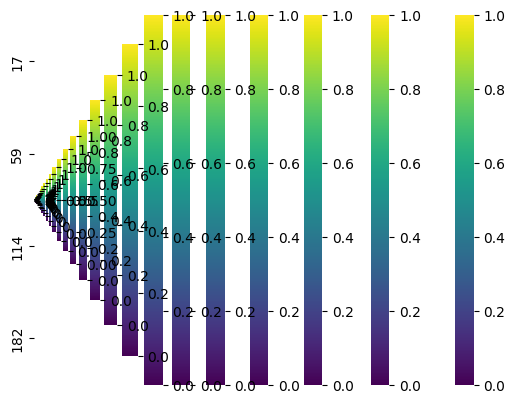

In [19]:
data = []

for name, indices in df_grouped.groups.items():
    group_df = df_done.loc[indices]
    if len(group_df) < 4:
        continue
    print(f'Group: {name}')
    
    x=group_df[["Acres", "Colonies"]]
    y=group_df["DollarsAcres"]

    # create a sample DataFrame
    df = group_df

    # add a constant term to the DataFrame
    df = sm.add_constant(df)
    sns.heatmap(df.isnull(), cmap="viridis")

    # create the regression model
    model = sm.OLS(group_df["DollarsAcres"], group_df[["Acres", "Colonies"]])
    # fit the model and print the summary
    results = model.fit()
    print(results.summary())
    r_squared = results.rsquared
    data.append([name, r_squared])

In [18]:
data

[[('ALMONDS', 'REGION 6 & 7 (AZ CA HI)'), 0.9999942669435952],
 [('APPLES', 'REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY OH PA RI VT WI)'),
  0.004432473195252751],
 [('APPLES', 'REGION 2 (AL DE GA KY MD NC SC TN VA WV)'), 0.9496740730834854],
 [('APPLES', 'REGION 4 (CO MN MT ND NV SD UT WY)'), 0.8982055601990124],
 [('APPLES', 'REGION 5 (AK ID OR WA)'), 0.09353099305167711],
 [('BLUEBERRIES',
   'REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY OH PA RI VT WI)'),
  0.26710381961299823],
 [('BLUEBERRIES', 'REGION 2 (AL DE GA KY MD NC SC TN VA WV)'),
  0.9955569591940616],
 [('BLUEBERRIES', 'REGION 3 (AR FL LA MO MS NM OK TX)'), 0.9043389315132607],
 [('BLUEBERRIES', 'REGION 5 (AK ID OR WA)'), 0.9884328373960127],
 [('CHERRIES',
   'REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY OH PA RI VT WI)'),
  0.9612138024521674],
 [('CHERRIES', 'REGION 4 (CO MN MT ND NV SD UT WY)'), 0.9568004229337703],
 [('CHERRIES', 'REGION 5 (AK ID OR WA)'), 0.8952348979138735],
 [('CHERRIES', 'REGION 6 & 7 (AZ 

In [14]:
df_done

,Year,Region,Commodity,Acres,DollarsAcres,DollarsColony,Colonies
0,2022,REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...,APPLES,68400.0,43.8,91.2,39000.0
1,2022,REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...,BLUEBERRIES,45900.0,179.0,98.4,87000.0
2,2022,REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...,CHERRIES,28000.0,34.5,78.9,16500.0
3,2022,REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...,CRANBERRIES,27700.0,185.0,81.6,65000.0
4,2022,REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY ...,CROP TOTALS,203400.0,21895000.0,91.0,87.5
...,...,...,...,...,...,...,...
221,2015,REGION 6 & 7 (AZ CA HI),MELONS,49.9,8000.0,NaN,82.2
222,2015,REGION 6 & 7 (AZ CA HI),PLUMS,46.8,20000.0,NaN,117.0
223,2015,REGION 6 & 7 (AZ CA HI),RASPBERRIES,85.5,20000.0,NaN,159.0
224,2015,REGION 6 & 7 (AZ CA HI),SUNFLOWER,147.0,6500.0,NaN,53.3


In [15]:
df_grouped

In [22]:
x=group_df[["Acres", "Colonies"]]
y=group_df["DollarsAcres"]
print(x)
print(y)

     Acres  Colonies
225   35.6      89.2
225    36000.0
Name: DollarsAcres, dtype: float64


## Neural Network


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def create_model(learning_rate):
    # Constructing the neural network
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        #tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(512, activation="relu"),
        #tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Dense(512, activation="relu"),
        
        tf.keras.layers.Dense(10)
    ])

    # Compiling the neural network
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    return model

def train_model(model, train_images, train_labels, epochs,
                validation_split=None):

  history = model.fit(train_images, train_labels,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  
# Hyperparameters
learning_rate = 0.001
epochs = 20
validation_split = 0.1

# Call the create model function
model = create_model(learning_rate)

# Train the model
train_model(model, train_images, train_labels, epochs=epochs)

2023-03-04 00:38:14.798633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 